In [ ]:
## DERIVASJON

### Analytisk
Når vi gjennomfører analytisk derivasjon finner vi ett mattematisk funksjonsuttryk som beskriver stigningingen til en funksjon f. Vi bruker matematiske regler for å gjøre dette, ettersom vi studererer når Δx går mot uendelig.

$ \frac{d}{{dx}}f\left( x \right) = \mathop {\lim }\limits_{\Delta x\to 0} \frac{{f\left( {x + \Delta x} \right) - f\left( x \right)}}{\Delta x} $

En slik metode fungerer veldig bra når vi skal derivere noe for hånd, eller vi har ett fast funksjonsuttryk men i de fleste tilfeller ønsker vi å analysere data fra virkeligheten, ikke bare rene funksjonsuttryk. Dette kalles ofte diskret derivasjon. I tillegg må vi bruke avanserte algoritmer for å implementere våre matematiske regler, slik at datamaskinen kan derivere for oss.


### Numerisk derivasjon
Numerisk derivasjon løser disse problemene ved å forenkle definisjonen av den deriverte:

$ f(x)\approx\frac{f(x+\Delta x)-f(x)}{\Delta x} $

Da kan vi bruke en valgfri Δx, og i ett datasett vil dette være mellomrommet mellom datapunktene. Hvis vi studerer en graf, kan vi få en tilnærmet lik derivert som den analytiske dersom vi bruker en liten nokk Δx. Python kan ikke operere med irrasjonale tall og derfor vil verdier som 10/3 bli rundet. Feilen i de fleste tilfeller blir minst dersom vi bruker en Δx omtrent lik 1E-8. 

### Fakta
* Dersom man deriverer lyden mister man bass i lydbilde.
* Hvis man deriverer ett bilde (hvor bilde er en funksjon av ett datqasett med lysstyrkeverdier i enten horisontal akse, eller vertikal) får man omrisset. Dette er fordi vi finner endringern av lysverdi.

## INTEGRASJON

### Numerisk integrasjon
Integrasjon kalles ofte å 'anti-derivere' siden man ønsker å finne ett uttrykk som hvis deriveres blir lik uttrykket man skal integrere. I praksis gir dette oss en funksjon for arealet under grafen til en funksjon. I numerisk integrasjon ønsker vi bare å finne det konkrete arealet. Dette kan gjøres ved å summere mange små rektangler som har høyde f(x) og en liten bredde. Jo flere rektangler, dessto mer nøyaktig svar. 

$ \int_{a}^{b}f(x)dx\approx h\sum_{k=0}^{n}f(x_{k}) \Leftrightarrow \Delta x = \frac{b-a}{n} $

Her representerer a begynnelsen av definisjonsmengden man vil finne arealet for, og b slutten. N er ett heltall som representerer hvor mange rektangler man skal bruke. 

In [4]:
# SCRIPT FOR Å TESTE AVVIK PÅ dx
import numpy as np
from pylab import *
from matplotlib.pyplot import *

def f(x):
    return x**2

def derivert(f, x, dx):
    derivert =  (f(x + dx) - f(x)) / dx
    return derivert

# LISTELØKKE FOR Å GENERERE LISTE MED STANDARDFORMER
verdier = [10**-i for i in range(1,17)] 

for standardform in verdier:
    print(f'Δx = {standardform}: har en feil på {round(abs(2-derivert(f,1, standardform)),15)}')

Δx = 0.1: har en feil på 0.100000000000002
Δx = 0.01: har en feil på 0.010000000000001
Δx = 0.001: har en feil på 0.000999999999697
Δx = 0.0001: har en feil på 9.9999999172e-05
Δx = 1e-05: har en feil på 1.000001393e-05
Δx = 1e-06: har en feil på 9.99924367e-07
Δx = 1e-07: har en feil på 1.01087807e-07
Δx = 1e-08: har en feil på 1.2154942e-08
Δx = 1e-09: har en feil på 1.65480742e-07
Δx = 1e-10: har en feil på 1.65480742e-07
Δx = 1e-11: har en feil på 1.65480742e-07
Δx = 1e-12: har en feil på 0.000177801164682
Δx = 1e-13: har en feil på 0.001598555674718
Δx = 1e-14: har en feil på 0.001598555674718
Δx = 1e-15: har en feil på 0.220446049250313
Δx = 1e-16: har en feil på 2.0


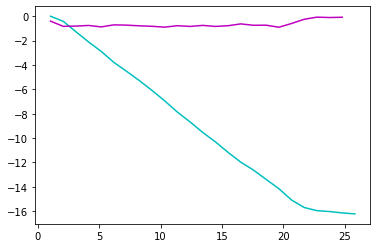

In [8]:
# EKSEMPEL PÅ DISKRET DERIVASJON
data = np.loadtxt('heistur.csv', skiprows = 1, delimiter = ',')

tid = data[:,0]
posisjon = data[:,2]

fart = []
for i in range(len(tid)-1):
    dy = posisjon[i+1] - posisjon[i]
    dx = tid[i+1] - tid[i]
    derivert = dy/dx
    fart.append(derivert)

plot(tid,posisjon, color='c', label='posisjon')
plot(tid[:-1], fart, color='m', label='fart')

## OPPGAVER
#### Oppgave 7.1

In [62]:
from pylab import *
from numpy import *
from matplotlib.pyplot import *
import math

# Definerer funksjonene i oppgaven som en liste av touples bestående av funksjonens string (som kan printes), og funksjonen som en lambda funksjon.

functions = [
    ('2*x + 1',lambda x: x+2),
    ('x^2 - 4*x + 5',lambda x: (x**2) - (4*x) + 5),
    ('e^x',lambda x: e**x),
    ('e^x - 5*x',lambda x: (e**x) - (5*x)),
    ('6*sqrt(x)-x',lambda x: (6*sqrt(x))-x),
    ('5*e^(-2x)',lambda x: 5*e**(-2*x)),
    ('sqrt(ln(x))',lambda x: sqrt(math.log(x))),
    ('4*ln(x^2)',lambda x: 4*math.log(x**2)),
    ('4 * 5^((x^3)-2*x)',lambda x: 4*(5**((x**3)-(2*x))))
]

dx = 1E-8

def derivative(f, x, dx):
    return (f(x + dx) - f(x)) / dx

# funksjon for å gi plottbare lister for x, f(x), f'(x), ut fra spesifiserte argumenter.
def graph(function, start, end, n):
    if type(function) is tuple:
        f_string, f = function
    else:
        f = function
    x_values = np.linspace(start,end,n)
    f_x = []
    f_x_derivative = []
    for x in x_values:
        f_x.append(f(x))
        f_x_derivative.append(derivative(f,x,dx))
    return x_values, f_x, f_x_derivative

# funksjon for å printe ut verditabell
def table(function, start, end):
    f_string, f = function
    for x in range(start,end+1):
        if x == start:
            print(f'for funksjonen {f_string}:')
        print(f"f({x}) = {float(f(x))} og f'({x}) = {round(derivative(f,x,dx),6)}")

for funksjonen x^2 - 4*x + 5:
f(2) = 1.0 og f'(2) = 0.0
f(3) = 2.0 og f'(3) = 2.0
f(4) = 5.0 og f'(4) = 4.0
f(5) = 10.0 og f'(5) = 6.0


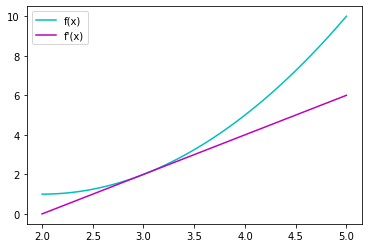

In [51]:
# 2
table(functions[1],2,5)
x_values, f_x, f_x_derivative = graph(functions[1],2,5,100)

plot(x_values,f_x,label="f(x)",color="c")
plot(x_values,f_x_derivative,label="f'(x)",color="m")
legend()

for funksjonen 5*e^(-2x):
f(2) = 0.09157819444367093 og f'(2) = -0.183156
f(3) = 0.012393760883331797 og f'(3) = -0.024788
f(4) = 0.0016773131395125599 og f'(4) = -0.003355
f(5) = 0.00022699964881242439 og f'(5) = -0.000454


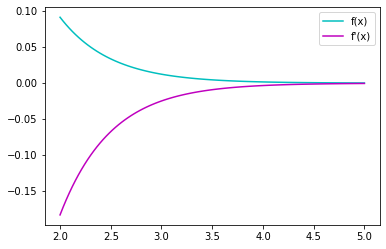

In [53]:
# 6
table(functions[5],2,5)
x_values, f_x, f_x_derivative = graph(functions[5],2,5,100)

plot(x_values,f_x,label="f(x)",color="c")
plot(x_values,f_x_derivative,label="f'(x)",color="m")
legend()

for funksjonen 4*ln(x^2):
f(2) = 5.545177444479562 og f'(2) = 4.0
f(3) = 8.788898309344878 og f'(3) = 2.666667
f(4) = 11.090354888959125 og f'(4) = 2.0
f(5) = 12.875503299472802 og f'(5) = 1.6


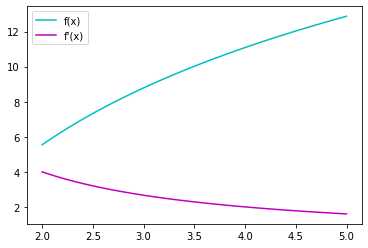

In [64]:
# 8
table(functions[7],2,5)
x_values, f_x, f_x_derivative = graph(functions[7],2,5,100)

plot(x_values,f_x,label="f(x)",color="c")
plot(x_values,f_x_derivative,label="f'(x)",color="m")
legend()

#### Oppgave 7.3

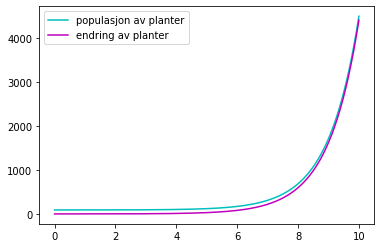

In [63]:
x_values, f_x, f_x_derivative = graph((lambda x: 0.2 * (e**x) + 90),0,10,1000)

plot(x_values,f_x,label="populasjon av planter",color="c")
plot(x_values,f_x_derivative,label="endring av planter",color="m")
legend()

In [ ]:
#### Oppgave 7.9

T'(42) = -0.29674778190269535


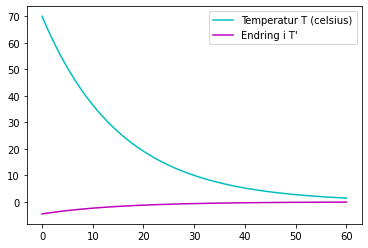

In [69]:
x_values, f_x, f_x_derivative = graph((lambda x: 70 * (e**(-0.065*x))),0,60,1000)

print(f"T'(42) = {derivative(lambda x: 70 * (e**(-0.065*x)), 42, dx)}")

plot(x_values,f_x,label="Temperatur T (celsius)",color="c")
plot(x_values,f_x_derivative,label="Endring i T'",color="m")
legend()

In [ ]:
#### Oppgave 7.12
Har på en måte gjort denne oppgaven med heisen lenger opp i dokumentet :) + finner ikke posisjon.txt fila

In [70]:
#### Oppgave 7.14
def integrer(a,b,function,N):
    f_string, f = function
    A = 0
    dx = (b - a)/N
    for i in range(N):
        A += f(a + i*dx)
    A = A*dx

    print(f'Integralet av {f_string} mellom a = {a} og b = {b} gir:\nA = {round(A,4)}\n')

for function in functions:
    integrer(1,4,function,1000)

Integralet av 2*x + 1 mellom a = 1 og b = 4 gir:
A = 13.4955

Integralet av x^2 - 4*x + 5 mellom a = 1 og b = 4 gir:
A = 5.9955

Integralet av e^x mellom a = 1 og b = 4 gir:
A = 51.8021

Integralet av e^x - 5*x mellom a = 1 og b = 4 gir:
A = 14.3246

Integralet av 6*sqrt(x)-x mellom a = 1 og b = 4 gir:
A = 20.4955

Integralet av 5*e^(-2x) mellom a = 1 og b = 4 gir:
A = 0.3385

Integralet av sqrt(ln(x)) mellom a = 1 og b = 4 gir:
A = 2.6596

Integralet av 4*ln(x^2) mellom a = 1 og b = 4 gir:
A = 20.3448

Integralet av 4 * 5^((x^3)-2*x) mellom a = 1 og b = 4 gir:
A = 6.74998451115368e+37

